In [168]:
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn import preprocessing
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.ensemble import IsolationForest

In [169]:
df = pd.read_csv('../data/winequality-red.csv')

In [170]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [172]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [173]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [174]:
df['quality'] = pd.cut(df.quality,bins=3,labels=['baixa','med','alta'])

In [175]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,med


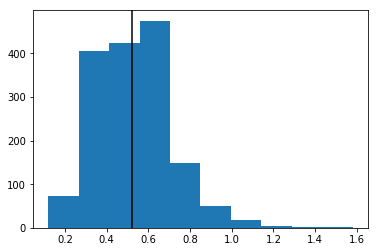

In [213]:
plt.hist(df['volatile acidity'])
plt.axvline(df['volatile acidity'].median(),c='black')

In [209]:
df['volatile acidity'].skew()

0.6715925723840199

In [204]:
df.quality.value_counts(normalize=True)

med      0.824891
alta     0.135710
baixa    0.039400
Name: quality, dtype: float64

In [182]:
x = df.drop(columns=['quality'])
y = df.quality

In [218]:
x.iloc[0,:]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
outlier                  1.0000
Name: 0, dtype: float64

In [217]:
pd.DataFrame(preprocessing.RobustScaler().fit_transform(x)).iloc[0,:]

0    -0.238095
1     0.720000
2    -0.787879
3    -0.428571
4    -0.150000
5    -0.214286
6    -0.100000
7     0.469799
8     1.052632
9    -0.333333
10   -0.500000
11    0.000000
Name: 0, dtype: float64

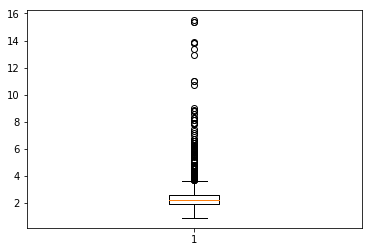

In [183]:
plt.boxplot(x['residual sugar']);

In [179]:
iso_for = IsolationForest(n_estimators=300,random_state=42)

In [184]:
df['outlier'] = pd.Series(iso_for.fit_predict(x))
df['score'] = iso_for.score_samples(x)

In [185]:
df.outlier.value_counts()

 1    1445
-1     154
Name: outlier, dtype: int64

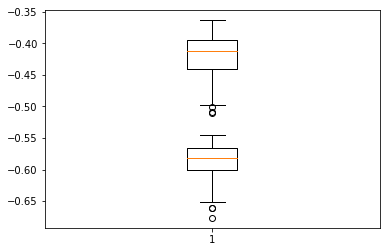

In [198]:
plt.boxplot(df.query("outlier == -1").score)
plt.boxplot(df.query("outlier == 1").score)

plt.show()

In [203]:
df.query("outlier == -1").quality.value_counts(normalize=True)

med      0.714286
alta     0.233766
baixa    0.051948
Name: quality, dtype: float64

In [135]:
x = df.drop(columns=['quality']).query("outlier != -1").drop(columns=['outlier'])
y = df.query("outlier != -1").quality

In [146]:
iso_for.fit(x)

IsolationForest(n_estimators=300, random_state=42)

In [150]:
iso_for.score_samples(x)

array([-0.41310867, -0.46075516, -0.40118843, ..., -0.42553285,
       -0.46339807, -0.4568587 ])

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [137]:
x_train.shape,x_test.shape

((1086, 11), (362, 11))

In [138]:
y_train.shape,y_test.shape

((1086,), (362,))

In [142]:
lr = LogisticRegression(random_state=42,C=0.8)
lr.fit(preprocessing.MinMaxScaler().fit_transform(x_train),y_train)

LogisticRegression(C=0.8, random_state=42)

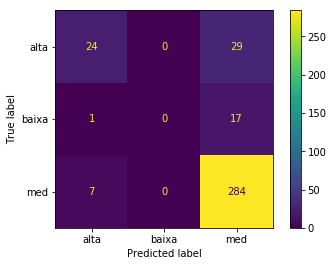

In [143]:
plot_confusion_matrix(lr,preprocessing.MinMaxScaler().fit_transform(x_test),y_test)

In [144]:
print(classification_report(y_test,lr.predict(preprocessing.MinMaxScaler().fit_transform(x_test))))

              precision    recall  f1-score   support

        alta       0.75      0.45      0.56        53
       baixa       0.00      0.00      0.00        18
         med       0.86      0.98      0.91       291

    accuracy                           0.85       362
   macro avg       0.54      0.48      0.49       362
weighted avg       0.80      0.85      0.82       362



/home/nasserboan/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(x)[0]).T

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567548,0.606299,0.137725,0.153846


In [76]:
x.iloc[0,:]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
Name: 0, dtype: float64

In [70]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
kn.

In [52]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

<BarContainer object of 11 artists>

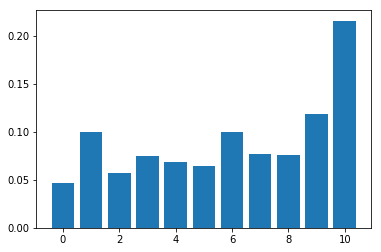

In [60]:
plt.bar(x=range(len(dt.feature_importances_)),height=dt.feature_importances_)

In [63]:
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)

In [64]:
dt.fit(x_scaled,y)

DecisionTreeClassifier(criterion='entropy')

<BarContainer object of 11 artists>

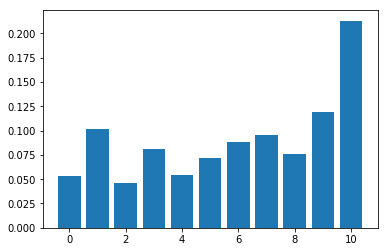

In [65]:
plt.bar(x=range(len(dt.feature_importances_)),height=dt.feature_importances_)